## Problem Metadata (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "compressionProcess",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_0uijb1pt",
        "subtopics": [
            {
                "key": "Fa25-L2a-9.0",
                "title": "Energy transfer by work to a closed system",
            }
        ]
    },
    "book_reference": {
      "chapter_number": 2,
      "title": "Energy, Energy Transfer, and General Energy Analysis",
        "sections": [
            "Energy Transfer by Work",
            "Mechanical Forms of Work",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
A piston compresses a gas inside of a piston-cylinder device. Consider three different processes: isothermal, isobaric, and adiabatic. Create a plot of pressure vs. volume for these three different compression processes.

## 2. Schematic
Draw a piston-cylinder device with a boundary inside of it. Indicate that work is being transferred into the system. For the isothermal and isobaric processes indicate that heat is being transferred out. For the adiabatic case indicate that there is no heat transfer in or out. 

## 3. Assumptions and Approximations
* **Ideal Gas Model** (Justification: Air at these conditions behaves as an ideal gas, $p v = R T$)
* **Quasi-equilibrium process** This is a necessary assumption if we are going to relate changes in properties to path functions like work, $W$.
* **Neglect changes in kinetic and potential energy**: $\Delta KE\approx0$, $\Delta PE\approx0$. (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Boundary work** is transferred through expansion ($p dV$).
* **Closed system** (no mass in or out).
* **Constant Specific Heats** ($c_p$, $c_v=\text{const}$). (Justification: The specific heat property changes are negligible over the process temperature range, simplifying the calculation of $\Delta~h$ to $c_p~\Delta~T$.

## 3. Physical Laws and Governing Equations

### Process: Compress Gas

Reversible process:

Consider a piston whose piston head area is, $S$. The piston head is displaced, compressing the gas inside of it. That gas inside is at a pressure, $p$. 

The force applied to the piston head is:

$$F=pS$$

If we shift the piston a distance, $dh$, an amount of work $dW$ is done:

$$dW=pSdh$$

$$W=\int_A^B~pdV$$

Let's analyze the isothermal compression of an ideal gas in a piston. 

$$dU=\delta~Q-\delta~W$$

$$W=\int_A^B~pdV$$

We know from the ideal gas law that:

$$pV=mRT$$

which we can re-write as:

$$p=\frac{mRT}{V}$$

Therefore, we have:

$$W=\int_A^B~\frac{mRT}{V}dV$$

Since $T$ is constant and it is a closed system (no mass transfer), we have:

$$W=mRT~\int_A^B~\frac{1}{V}dV $$

$$W=mRT~\ln~\frac{V_A}{V_B}$$

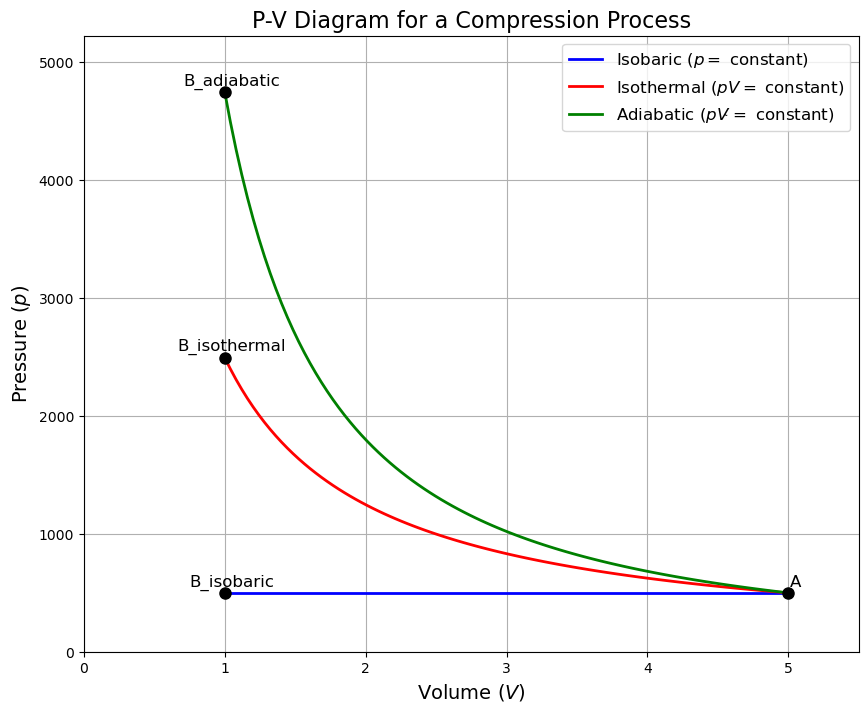

In [1]:
## 4. 💻 Code Block: Initial Setup and Properties (Code Cell)

import matplotlib.pyplot as plt
import numpy as np

# n = number of moles, R = ideal gas constant (J/(mol*K)), T = temperature (K)
n = 1.0
R = 8.314
T_initial = 300  # Initial temperature in Kelvin
k = 1.4      # Adiabatic index for a diatomic ideal gas

# Define the initial and final volumes for the processes
V_initial = 5.0  # Initial volume in m^3
V_final = 1.0    # Final volume in m^3

## 5. Properties (Code Cell)
# Define a common initial pressure
P_initial = (n * R * T_initial) / V_initial

# Define the range of volumes for the plot
V = np.linspace(V_initial, V_final, 100)

# 6 Calculations (Code Cell)
# 1. Isobaric Process (Constant Pressure)
p_isobaric = np.full_like(V, P_initial)
P_final_isobaric = P_initial

# 2. Isothermal Process (Constant Temperature)
constant_isothermal = P_initial * V_initial
p_isothermal = constant_isothermal / V
P_final_isothermal = constant_isothermal / V_final

# 3. Adiabatic Process (No Heat Transfer)
constant_adiabatic = P_initial * (V_initial**k)
p_adiabatic = constant_adiabatic / (V**k)
P_final_adiabatic = constant_adiabatic / (V_final**k)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(V, p_isobaric, label='Isobaric ($p=$ constant)', color='blue', linewidth=2)
plt.plot(V, p_isothermal, label='Isothermal ($pV=$ constant)', color='red', linewidth=2)
plt.plot(V, p_adiabatic, label='Adiabatic ($pV^{\k}=$ constant)', color='green', linewidth=2)

# Add a marker for the initial state "A"
plt.plot(V_initial, P_initial, 'o', color='black', markersize=8)
plt.annotate('A', xy=(V_initial, P_initial), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

# Add markers and labels for the final states "B"
plt.plot(V_final, P_final_isobaric, 'o', color='black', markersize=8)
plt.annotate('B_isobaric', xy=(V_final, P_final_isobaric), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

plt.plot(V_final, P_final_isothermal, 'o', color='black', markersize=8)
plt.annotate('B_isothermal', xy=(V_final, P_final_isothermal), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

plt.plot(V_final, P_final_adiabatic, 'o', color='black', markersize=8)
plt.annotate('B_adiabatic', xy=(V_final, P_final_adiabatic), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Volume ($V$)', fontsize=14)
plt.ylabel('Pressure ($p$)', fontsize=14)
plt.title('P-V Diagram for a Compression Process', fontsize=16)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Set axis limits
plt.xlim(0, V_initial * 1.1)
max_p = max(P_final_adiabatic, P_final_isothermal, P_final_isobaric)
plt.ylim(0, max_p * 1.1)

# Show the plot
# plt.savefig('p-V-compression.png')
plt.show()

## 7. Summary and Reasoning
If the state of the system can be represented on a $(p,V)$ diagram, the work performed during a transformation has a simple geometric representation. 

Transformations which are especially important are those for which the initial and final states are the same. these are called cyclical transformations or cycles. A cycle, therefore is a transformation which brings the system back to its initial state. If the state of the system can be represented on a volume pressure diagram then a cycle can be represented on this diagram by a closed curve, such as the curve, 1234. 

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---